In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fb_percentiles = pd.read_excel('/Users/harishprabhala/Documents/fb_posts_top_bottom.xlsx')

In [3]:
fb_percentiles.head()

,name,message,description,status_type,likes_count,comments_count,shares_count,year,likes_percentile,shares_percentile
0,NaN,Obama: 'The world needs a strong America and i...,NaN,mobile_status_update,22315,9497,352,2012-10-23 01:34:03,0.999,0.895
1,Timeline Photos,BREAKING NEWS: ABC News projects Barack Obama ...,NaN,added_photos,14786,1251,3188,2012-11-07 04:30:06,0.999,0.994
2,Timeline Photos,Inventors of a cup that changes color when in ...,NaN,added_photos,15210,701,5384,2012-12-11 16:20:02,0.999,0.998
3,Timeline Photos,'Our hearts are broken today' - President Bara...,NaN,added_photos,20803,1673,8596,2012-12-14 20:21:19,0.999,0.999
4,Timeline Photos,"The parents of Jessica Rekos, a 6-year-old gir...",NaN,added_photos,17402,914,1646,2012-12-17 16:52:33,0.999,0.987


In [4]:
fb_percentiles['full_text'] = fb_percentiles['name'].map(str) + ' ' + fb_percentiles['message'].map(str) + ' ' + fb_percentiles['description'].map(str)

In [5]:
fb_percentiles_copy = fb_percentiles[['full_text','likes_count','shares_count','likes_percentile','shares_percentile']]

In [6]:
fb_percentiles_copy.head()

,full_text,likes_count,shares_count,likes_percentile,shares_percentile
0,nan Obama: 'The world needs a strong America a...,22315,352,0.999,0.895
1,Timeline Photos BREAKING NEWS: ABC News projec...,14786,3188,0.999,0.994
2,Timeline Photos Inventors of a cup that change...,15210,5384,0.999,0.998
3,Timeline Photos 'Our hearts are broken today' ...,20803,8596,0.999,0.999
4,"Timeline Photos The parents of Jessica Rekos, ...",17402,1646,0.999,0.987


In [7]:
fb_percentiles_copy['likes_class'] = fb_percentiles_copy['likes_percentile'].apply(lambda x: '1' if x > 0.75 else '0') 

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
fb_percentiles_copy.tail()

,full_text,likes_count,shares_count,likes_percentile,shares_percentile,likes_class
248214,Simon Nixon nan Simon Nixon is Chief European ...,0,0,0.0,0.000,0
248215,"Ukrainian Billionaire, Wanted by U.S., Builds ...",24,11,0.0,0.009,0
248216,Former Korean Air Executive Found Guilty Over ...,6,4,0.0,0.013,0
248217,Yaroslav Trofimov nan Author of 'Middle East C...,0,0,0.0,0.000,0
248218,Barron's Asia nan Barron's Asia is a premier i...,0,0,0.0,0.000,0


In [9]:
fb_percentiles_copy['likes_class'].value_counts()

0    127681
1    120538
Name: likes_class, dtype: int64

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import gensim.parsing.preprocessing as process

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishprabhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess (line):
    line = re.sub(r"http\S+", "", line)
    line = re.sub(r"Photos", "", line)
    line = re.sub(r"Timeline", "", line)
    line = re.sub(r"nan", "", line)
    line = re.sub(r"photo", "", line)
    line = line.lower()
    line = process.remove_stopwords(line)
    line = process.strip_numeric(line)
    line = process.strip_punctuation(line)
    line = process.strip_short(line)
    line = process.strip_multiple_whitespaces(line)
    tokens = sent_tokenize(line)
    stemmed = [w for w in tokens if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [15]:
text = []
for w in fb_percentiles_copy['full_text']:
    text.append(preprocess(w))

In [16]:
X,y = text, fb_percentiles_copy['likes_class']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer()
X_1 = vectorizer.fit_transform(X)

In [19]:
from sklearn.feature_selection import chi2

In [20]:
chi2score = chi2(X_1, y)[0]

In [21]:
X_new = SelectKBest(chi2, k=28000).fit_transform(X_1, y)

In [22]:
X_new.shape, y.shape

((248219, 28000), (248219,))

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.33, random_state=0)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((166306, 28000), (81913, 28000), (166306,), (81913,))

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logit=LogisticRegression(C=1)
logit.fit(X_train,Y_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X_test), Y_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X_train), Y_train)))
print("\n")
print ('Classification report summary of Logistic Regression')
print(classification_report(logit.predict(X_test), Y_test))

Accuracy of test data:  0.733729688816
Accuracy of training data:  0.793994203456


Classification report summary of Logistic Regression
             precision    recall  f1-score   support

          0       0.75      0.74      0.74     42515
          1       0.72      0.73      0.72     39398

avg / total       0.73      0.73      0.73     81913



In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [28]:
y_true_auc = np.array(Y_test).astype(int)
y_pred_auc = np.array(logit.predict(X_test)).astype(int)

In [29]:
Logistic_auc = roc_auc_score(y_true_auc, y_pred_auc)
Logistic_auc

0.73337923906067826

In [30]:
probas2_ = logit.predict_proba(X_test)[:,1]

In [31]:
fpr2,tpr2,_ = roc_curve(y_true_auc, probas2_)

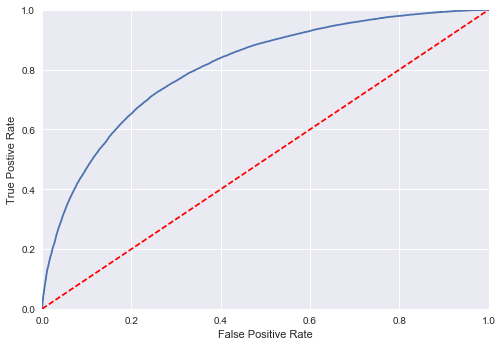

In [34]:
plt.plot(fpr2,tpr2, label=('Logistic %.2f' %Logistic_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
wscores = (dict(zip(vectorizer.get_feature_names(),chi2score)))

In [31]:
a = pd.DataFrame.from_dict(wscores, orient='index')

In [32]:
a.columns = ['Score']

In [33]:
a.sort_values('Score', ascending=False).head(20)

,Score
obama,3443.466430
old,1913.622613
trump,1648.650409
president,1417.906763
clinton,1415.308541
dog,1192.379996
baby,1142.720744
photo,1002.419308
questions,988.125842
hillary,968.872161


In [39]:
feat_name = vectorizer.get_feature_names()

In [63]:
top_feat = np.array(feat_name[:28000])

In [64]:
top_feat.shape

(28000,)

In [71]:
coeff = np.array(logit.coef_)[0]

In [72]:
coeff.shape

(28000,)

In [74]:
coff = (dict(zip(top_feat,coeff)))

In [75]:
b = pd.DataFrame.from_dict(coff, orient='index')

In [77]:
b.columns = ['coefficient']

In [83]:
b.sort_values('coefficient', ascending=False).head(10)

,coefficient
baddest,2.317496
bullishness,2.279021
commonalities,2.247653
beaver,2.140309
chugged,2.021058
cabello,2.002660
alohahuffpost,1.959803
disappoints,1.889464
burqini,1.866203
admini,1.853098


In [34]:
clf2=MultinomialNB(alpha=0.01)
clf2.fit(X_train,Y_train)
print ('Accuracy of test data: ',(accuracy_score(clf2.predict(X_test), Y_test)))
print ('Accuracy of training data: ',(accuracy_score(clf2.predict(X_train), Y_train)))
print("\n")
print ('Classification report summary of MultinomialNB with alpha = 0.01:')
print(classification_report(clf2.predict(X_test), Y_test))

Accuracy of test data:  0.73418138757
Accuracy of training data:  0.760453621637


Classification report summary of MultinomialNB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.73      0.75      0.74     40934
          1       0.74      0.72      0.73     40979

avg / total       0.73      0.73      0.73     81913



In [35]:
y_true_auc1 = np.array(Y_test).astype(int)
y_pred_auc1 = np.array(clf2.predict(X_test)).astype(int)

In [36]:
MultiNB = roc_auc_score(y_true_auc1, y_pred_auc1)
MultiNB

0.73437437485417867

In [37]:
from sklearn.ensemble import RandomForestClassifier 

In [38]:
random=RandomForestClassifier()
random.fit(X_train,Y_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X_test), Y_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X_train), Y_train)))
print("\n")
print ('Classification report summary of Random Forest Classifier')
print(classification_report(random.predict(X_test), Y_test))

Accuracy of test data:  0.675460549608
Accuracy of training data:  0.985749161185


Classification report summary of Random Forest Classifier
             precision    recall  f1-score   support

          0       0.73      0.67      0.70     46130
          1       0.62      0.68      0.65     35783

avg / total       0.68      0.68      0.68     81913

